In [140]:
# Load the Pandas libraries with alias 'pd' 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("winequalityN.csv") 
print (data.shape)
data = data.dropna()
print (data.shape)
data.head(5)

(6497, 13)
(6463, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


(6463, 13)
(6463, 12)


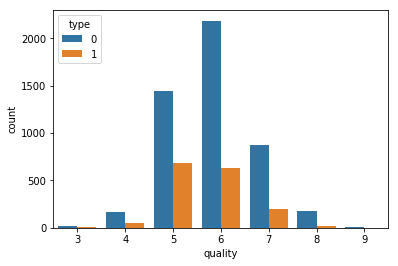

In [141]:
## Replacing categorical variale wine type white to 0 and red to 1
data = data.replace('white', 0)
data = data.replace('red', 1)
print (data.shape)

## Data description - histogram of counts y wine qualityand y wine type
ax = sb.countplot(x="quality", hue="type", data=data)

## Divide data into data and lael
wineData = data.drop(['quality'],axis=1)
print (wineData.shape)
wineQuality_index = data['quality']
#print (wineQuality_index)

In [154]:
df = pd.DataFrame(data)
qualitydata = df.loc[1:6463,['type','quality']]
#print(qualitydata)
qua

      type  quality
1        0        6
2        0        6
3        0        6
4        0        6
5        0        6
6        0        6
7        0        6
8        0        6
9        0        6
10       0        5
11       0        5
12       0        5
13       0        7
14       0        5
15       0        7
16       0        6
18       0        6
19       0        5
20       0        8
21       0        7
22       0        8
23       0        5
24       0        6
25       0        6
26       0        6
27       0        6
28       0        6
29       0        7
30       0        6
31       0        6
...    ...      ...
6434     1        6
6435     1        6
6436     1        5
6437     1        5
6438     1        6
6439     1        7
6440     1        6
6441     1        6
6442     1        7
6443     1        6
6444     1        5
6445     1        5
6446     1        5
6447     1        8
6448     1        5
6449     1        5
6450     1        6
6451     1        5


In [146]:
wine = wineData.values
print(wine.shape)
winetype = []
winetype = np.array(wine[:,0])
#print (winetype)
winetype = np.reshape(winetype, (6463,1))
print(winetype)
n = np.count_nonzero(winetype)
print(n)
print(len(winetype)-n)
#we have 1593 redwine and 4870 whitewine

(6463, 12)
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
1593
4870


In [148]:
#seperate wine into redwine(1593,12) and whitewine(4870,12) 
redwine = np.empty([1593,12])
whitewine = np.empty([4870,12])
d = wine.shape[1]
ob = wine.shape[0]
for i in range(ob):
    if wine[i,0] == 0:
        redwine = redwine + wine[i,:] 
    elif wine[i,0] == 1:
        whitewine = whitewine + wine[i,:]
print (redwine.shape)
print(whitewine.shape)

(1593, 12)
(4870, 12)


In [155]:
## Divide redwine data in traning and test sets
X_redtrain, X_redtest, y_redtrain, y_redtest = train_test_split(redwine, ???, test_size=0.33, random_state=100)
print (len(X_redtest))
print (len(X_redtrain))

ValueError: Found input variables with inconsistent numbers of samples: [1593, 6463]

In [66]:
#using gradient decent classifer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
#from plotting the x vs.'quality', we see that pH and density for all wines are similar, so we can reduce the dimension by deduct these two.
#data = data.drop( ["density"], axis = 1)
#data = data.drop(["pH"], axis = 1)
data.shape
winedata = SGDClassifier(penalty = None)
winedata.fit(X_train, y_train)
pred_wine = winedata.predict(X_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [69]:
print (classification_report(y_test, pred_wine))
print (confusion_matrix(y_test, pred_wine))

              precision    recall  f1-score   support

           3       0.33      0.18      0.24        11
           4       0.06      0.01      0.02        75
           5       0.42      0.60      0.50       702
           6       0.47      0.26      0.33       946
           7       0.38      0.59      0.46       345
           8       0.09      0.08      0.08        53
           9       0.00      0.00      0.00         1

   micro avg       0.41      0.41      0.41      2133
   macro avg       0.25      0.25      0.23      2133
weighted avg       0.41      0.41      0.39      2133

[[  2   0   5   4   0   0   0]
 [  2   1  45  13  14   0   0]
 [  2   5 424 208  58   5   0]
 [  0  10 436 245 231  24   0]
 [  0   1  88  44 202  10   0]
 [  0   0  12   6  31   4   0]
 [  0   0   0   0   1   0   0]]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [71]:
#only 41% accurancy, not very good, let's do random rain forest model
from sklearn.ensemble import RandomForestClassifier
rfc_wine = RandomForestClassifier(n_estimators=200)
rfc_wine.fit(X_train, y_train)
pred_rfc_wine = rfc_wine.predict(X_test)

print (classification_report(y_test, pred_wine))
print (confusion_matrix(y_test, pred_wine)) 

              precision    recall  f1-score   support

           3       0.33      0.18      0.24        11
           4       0.06      0.01      0.02        75
           5       0.42      0.60      0.50       702
           6       0.47      0.26      0.33       946
           7       0.38      0.59      0.46       345
           8       0.09      0.08      0.08        53
           9       0.00      0.00      0.00         1

   micro avg       0.41      0.41      0.41      2133
   macro avg       0.25      0.25      0.23      2133
weighted avg       0.41      0.41      0.39      2133

[[  2   0   5   4   0   0   0]
 [  2   1  45  13  14   0   0]
 [  2   5 424 208  58   5   0]
 [  0  10 436 245 231  24   0]
 [  0   1  88  44 202  10   0]
 [  0   0  12   6  31   4   0]
 [  0   0   0   0   1   0   0]]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
